In [2]:
pip install opendatasets --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Download the data

In [3]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jtgh721
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:02<00:00, 131MB/s]


In [4]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'


##Data preparation and cleaning


- Load the file using Pandas
- Look at some information about the data & the columns
- Fix any missing or incorrect values

df.head(10)
df.info()
df.describe()
df.select_dtypes()


In [5]:
import pandas as pd

df = pd.read_csv(data_filename)

df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
# get numeric columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

Percentage of missing values per column



In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages


Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [ ]:
type(missing_percentages)

pandas.core.series.Series

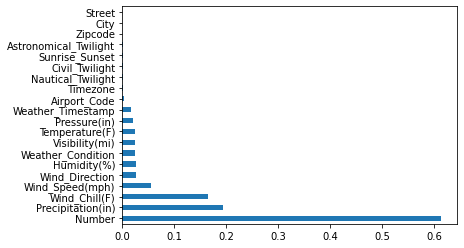

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Consider removing columns with over 50% of missing data.

# Exploratory and Visualization

Columns analyze:

1.   City
2.   Missing States
1.   New York City
3.   Start Time
4.   Start_Lat, Start_Lng
5.   Temperature
6.   Weather Condition







## 1. City

In [ ]:
# number of uniqe cities in City feild

cities = df.City.unique()
len(cities)

11682

In [ ]:
# 1. Accidents among Cities

cities_by_accident = df.County.value_counts()
cities_by_accident[:30]

Los Angeles         234122
Miami-Dade          143939
Orange              114917
San Bernardino       55018
Dallas               50050
San Diego            48366
Sacramento           46708
Harris               42559
Riverside            42176
Montgomery           41476
Alameda              38997
Mecklenburg          35191
Maricopa             33539
Wake                 31662
Santa Clara          27415
Hennepin             26560
Davidson             26259
Lake                 23584
Marion               22437
Cook                 21335
Kern                 21310
Broward              21217
Jackson              20832
Travis               20689
Hillsborough         20499
Salt Lake            20059
Contra Costa         19726
Multnomah            19303
East Baton Rouge     19021
Fairfax County       17948
Name: County, dtype: int64

In [ ]:
type(cities_by_accident)

pandas.core.series.Series

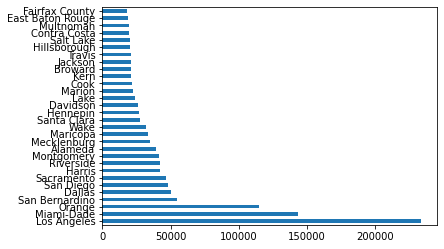

In [ ]:
cities_by_accident[:30].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

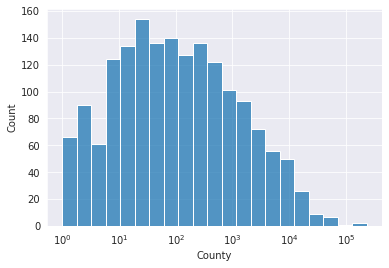

In [ ]:
sns.histplot(cities_by_accident, log_scale=True)


In [ ]:
cities_by_accident[cities_by_accident <= 1 ].sum()

66

## 2.   Missing States


In [ ]:
df['State'].unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [ ]:
pd.Series(df['State'].unique()).count()


49

In [ ]:
# import data for comparing missing States

all_50_states= [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

from numpy.ma.core import count
count(all_50_states)


51

In [ ]:
import numpy as np

df1 = pd.Series({'col1': all_50_states})
df2 = pd.Series({'col2': df['State'].unique()})

print("df.State is missing",np.setdiff1d(df1['col1'], df2['col2']))

df.State is missing ['AK' 'HI']


## 3. Number of accidents New York City

In [ ]:
# Accidents in New York City (5 Boroughs)

NYC_county = ['Bronx', 'New York', 'Kings', 'Richmond','Queens']

Accidents_NY = df[df['State']=='NY']

Accidents_NY[Accidents_NY['County'].isin(NYC_county)]['County'].value_counts()


Queens      12556
Bronx        9461
New York     7155
Kings        5983
Richmond     1561
Name: County, dtype: int64

In [ ]:
Accidents_NY[Accidents_NY['County'].isin(NYC_county)]['County'].count()


36716

## 4. Start Time

In [ ]:
df.Start_Time


0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


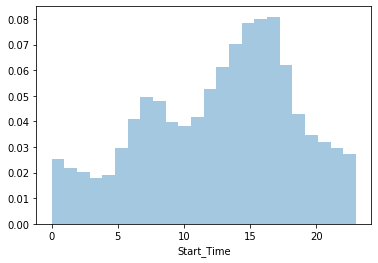

In [ ]:
# covert 'Start_Time' to datetime 
df.Start_Time = pd.to_datetime(df.Start_Time)

import seaborn as sns

sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)


1. A high % of accidents occur between 2pm to 6pm (probably people in a hurry to get back home)
2. Next higest percentage is 7am to 9am.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


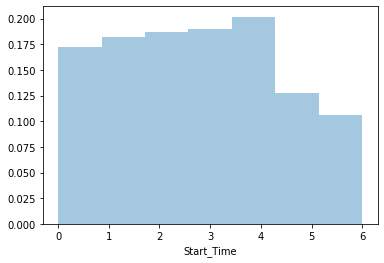

In [ ]:
# how about accidents occurance during a week?
# 0 - 6 indicates Monday to Sunday

sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


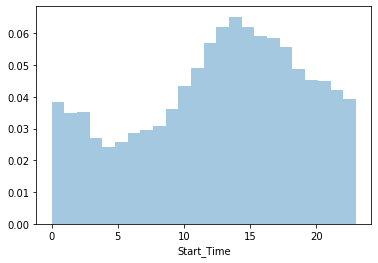

In [ ]:
# on Saturday

weekends_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5&6]
sns.distplot(weekends_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

accident in thorught out a year in months



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


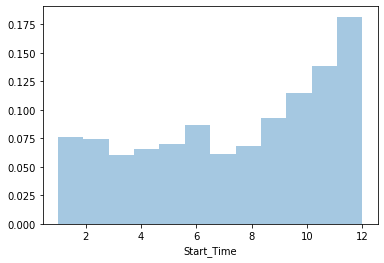

In [ ]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)


In [ ]:
# df_2019 = 
# df[df.Start_Time.dt.year == 2021].count()
# df_2019_Bing = df_2019[df_2019.Source == 'MapQuest']
# sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

df.Timezone.count_values()


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## 5. Start Latitude & Longitude


In [ ]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [ ]:
df.Start_Lng


0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

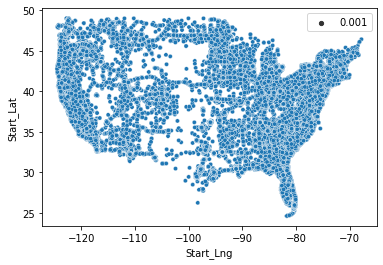

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)


In [ ]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

2266021    40.861880
537802     38.842903
2094795    38.596377
349514     32.856192
702343     35.964352
             ...    
2069621    41.801830
1211547    30.205403
1792776    36.988472
545075     34.075030
1384306    37.584156
Name: Start_Lat, Length: 100, dtype: float64
2266021    -73.912560
537802     -77.008656
2094795   -121.443656
349514     -96.904798
702343    -119.152082
              ...    
2069621    -88.069080
1211547    -97.758230
1792776   -119.893673
545075     -80.946074
1384306   -122.328289
Name: Start_Lng, Length: 100, dtype: float64


In [8]:
# create a list of list with lat & lng
zip(list(df.Start_Lat), list(df.Start_Lng))

In [10]:
# put lat & lng on a actual map
import folium
from folium.plugins import HeatMap

# get 0.1% of all data point
sample_df = df.sample(int(0.001 * len(df))) 

# create a list of list with lat & lng
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

# center the map with mean Lat and Lng
m = folium.Map(location=[df.Start_Lat.mean(), df.Start_Lng.mean()], zoom_start=5)

# Heatmap
HeatMap(lat_lon_pairs).add_to(m)

m


In [ ]:
# comparing distribution with heatmap and different zones

Time_zone = df.groupby('Timezone')["ID"].count().sort_values(ascending=False)

Time_zone

Timezone
US/Eastern     1221927
US/Pacific      967094
US/Central      488065
US/Mountain     164597
Name: ID, dtype: int64

In [ ]:
# dTime_zonef['%'] = scaler.fit_transform(df[["TOTAL"]])

Time_zone/Time_zone.sum()*100


Timezone
US/Eastern     43.000116
US/Pacific     34.032438
US/Central     17.175209
US/Mountain     5.792237
Name: ID, dtype: float64

## 6. Temperature

# Ask and Answer question 
- are there more accidents in warmer or colder area ?
- which 5 states have the highest number of accidents/per capita? (needs population from other DB) 
- Among the top 100 cities in the # of accidents, which state have higher frequency? 
- New York City is splited into different neighbours, calculate population vs 3 of accidents is difficult
- 'AK' 'HI' 
- What time of the day are accidents most frequent in? - ANSWERED
- Which days of the week have the most accidents?
- Which months have the most accidents?
- What is the trend of accidents year over year (decreasing/increasing?) ? in New York?
When is accidents per unit of traffic the highest.



# Summary and conclusion
- data on 2016 is not complete !